In [111]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
df = pd.read_csv('dataset.csv',index_col=0)

In [25]:
df.shape

(114000, 20)

In [32]:
df.describe()

,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,114000.000000,1.140000e+05,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000
mean,33.238535,2.280292e+05,0.566800,0.641383,5.309140,-8.258960,0.637553,0.084652,0.314910,0.156050,0.213553,0.474068,122.147837,3.904035
std,22.305078,1.072977e+05,0.173542,0.251529,3.559987,5.029337,0.480709,0.105732,0.332523,0.309555,0.190378,0.259261,29.978197,0.432621
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,1.740660e+05,0.456000,0.472000,2.000000,-10.013000,0.000000,0.035900,0.016900,0.000000,0.098000,0.260000,99.218750,4.000000
50%,35.000000,2.129060e+05,0.580000,0.685000,5.000000,-7.004000,1.000000,0.048900,0.169000,0.000042,0.132000,0.464000,122.017000,4.000000
75%,50.000000,2.615060e+05,0.695000,0.854000,8.000000,-5.003000,1.000000,0.084500,0.598000,0.049000,0.273000,0.683000,140.071000,4.000000
max,100.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000


In [67]:
df.dtypes

track_id             object
artists              object
album_name           object
track_name           object
popularity            int64
duration_ms           int64
explicit               bool
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
time_signature        int64
track_genre          object
dtype: object

In [46]:
pop = df['popularity']

In [60]:
df.loc[df['popularity'] == 100]

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
20001,3nqQXoyQOWXiESFLlDF1hG,Sam Smith;Kim Petras,Unholy (feat. Kim Petras),Unholy (feat. Kim Petras),100,156943,False,0.714,0.472,2,-7.375,1,0.0864,0.013,0.000005,0.266,0.238,131.121,4,dance
81051,3nqQXoyQOWXiESFLlDF1hG,Sam Smith;Kim Petras,Unholy (feat. Kim Petras),Unholy (feat. Kim Petras),100,156943,False,0.714,0.472,2,-7.375,1,0.0864,0.013,0.000005,0.266,0.238,131.121,4,pop


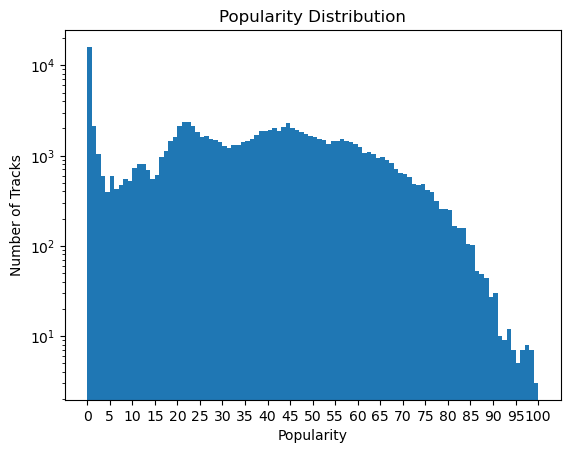

In [61]:
plt.hist(pop,bins=range(101),log=True);
plt.ylabel("Number of Tracks");
plt.xlabel("Popularity");
plt.title("Popularity Distribution");
plt.xticks(range(0,101,5));

In [96]:
# Energy and Popularity

In [ ]:
# Energy is a value between 0 and 1, while popularity is between 0 and 100
# Can more energetic tracks become popular?

In [99]:
high_energy = (len(df[df['energy'] >= 0.7]) / len(df)) * 100

In [132]:
high_energy_pop = df[df['energy'] >= 0.7]['popularity'].mean()

In [102]:
low_energy = (len(df[df['energy'] <= 0.5]) / len(df)) * 100

In [131]:
low_energy_pop = df[df['energy'] <= 0.5]['popularity'].mean()

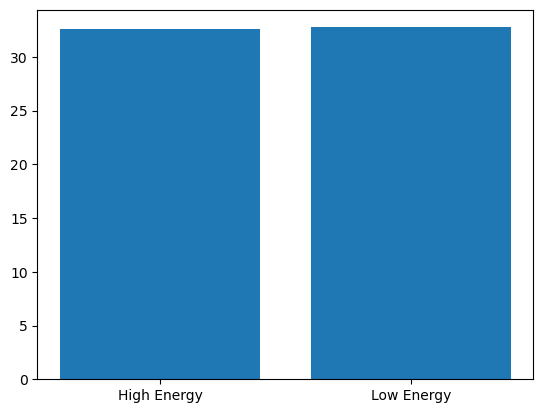

In [129]:
plt.bar(["High Energy","Low Energy"],[high_energy_pop,low_energy_pop]);

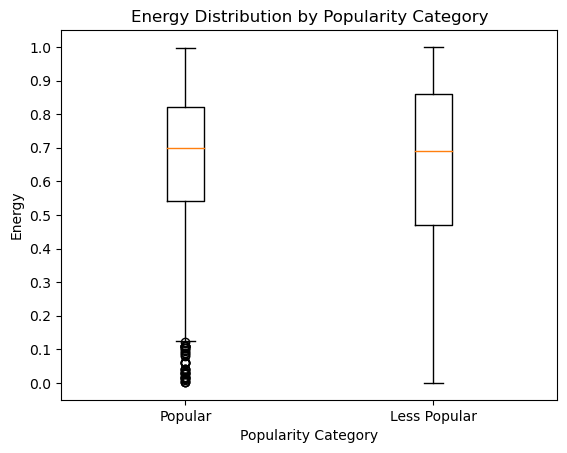

In [162]:
energy_pop = df[df['popularity']>= 70]['energy']
energy_npop = df[df['popularity']<= 50]['energy']
label = ['Popular','Less Popular']
fig = plt.figure()
ax = fig.add_subplot(111)
ax.boxplot([energy_pop, energy_npop], labels=label);
ax.set_xlabel('Popularity Category')
ax.set_ylabel('Energy')
ax.set_title('Energy Distribution by Popularity Category');
y_ticks = np.arange(0,1.1,0.1)
ax.set_yticks(y_ticks);


***Artist Analysis***

In [ ]:
# Finding the top 10 artists with the most tracks and 
#calcualting their average popularity

In [21]:
grouped = df.groupby(['artists']).agg({'artists':'first','track_id':'count','popularity':'mean'})

In [22]:
result = grouped.sort_values('track_id',ascending=False).head(10)

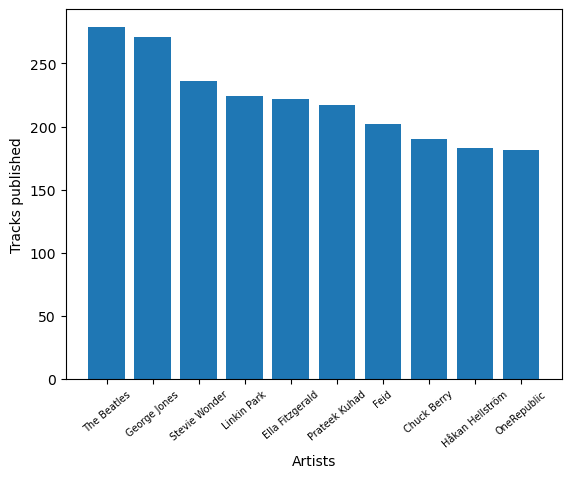

In [42]:
plt.bar(result['artists'],result['track_id']);
plt.ylabel('Tracks published')
plt.xlabel('Artists')
plt.xticks(result['artists'],rotation=40,size=7);
plt.show()

C:\Users\Bence\AppData\Local\Temp\ipykernel_2368\2291982605.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(result['artists'], rotation='vertical', size=7)
C:\Users\Bence\AppData\Local\Temp\ipykernel_2368\2291982605.py:11: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


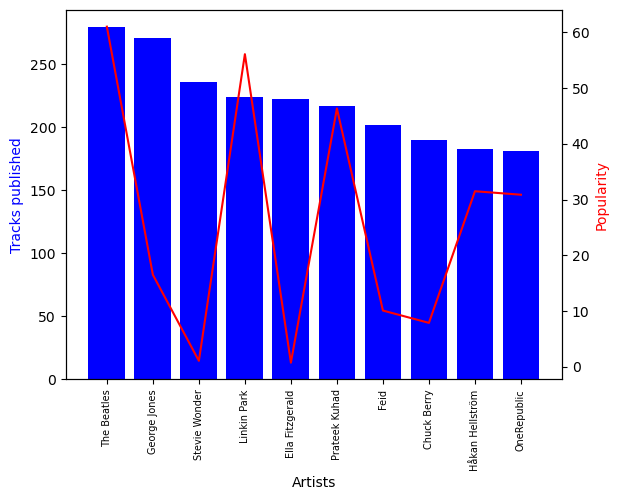

In [49]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.bar(result['artists'],result['track_id'],color='b');
ax2.plot(result['artists'],result['popularity'],color='r');

ax1.set_xlabel('Artists')
ax1.set_ylabel('Tracks published', color='b')
ax2.set_ylabel('Popularity', color='r')
ax1.set_xticklabels(result['artists'], rotation='vertical', size=7)

fig.show()

***Album Analysis***

In [43]:
#Selecting the top 10 most popular albums.
a = df.groupby(['album_name']).agg({'album_name':'first','duration_ms':'mean','popularity':'mean'})
a = a.sort_values('popularity',ascending=False).head(10)

In [44]:
a['minutes'] = round((a['duration_ms'] / 1000)/60,3)

In [45]:
a

,album_name,duration_ms,popularity,minutes
album_name,,,,
Unholy (feat. Kim Petras),Unholy (feat. Kim Petras),156943.0,100.0,2.616
"Quevedo: Bzrp Music Sessions, Vol. 52","Quevedo: Bzrp Music Sessions, Vol. 52",198937.0,99.0,3.316
La Bachata,La Bachata,162637.0,98.0,2.711
Indigo (Extended),Indigo (Extended),184613.0,96.0,3.077
"I Ain’t Worried (Music From The Motion Picture ""Top Gun: Maverick"")",I Ain’t Worried (Music From The Motion Picture...,148485.0,96.0,2.475
RENAISSANCE,RENAISSANCE,225388.0,93.0,3.756
PROVENZA,PROVENZA,210200.0,93.0,3.503
Harry's House,Harry's House,167303.0,92.0,2.788
Super Freaky Girl,Super Freaky Girl,170977.0,92.0,2.850


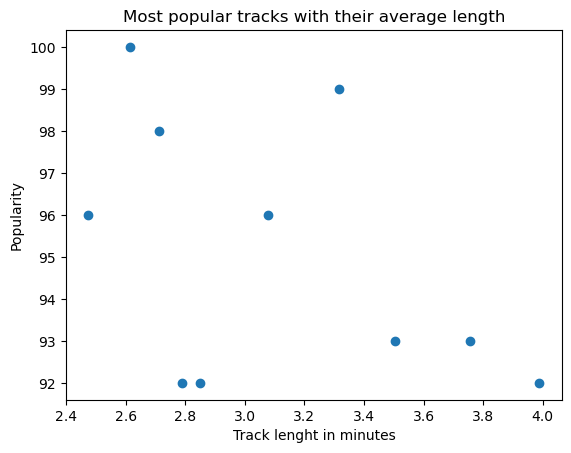

In [66]:
plt.scatter(a['minutes'],a['popularity']);
plt.xlabel('Track lenght in minutes');
plt.ylabel('Popularity');
plt.title('Most popular tracks with their average length');

**Explicit Analysis**

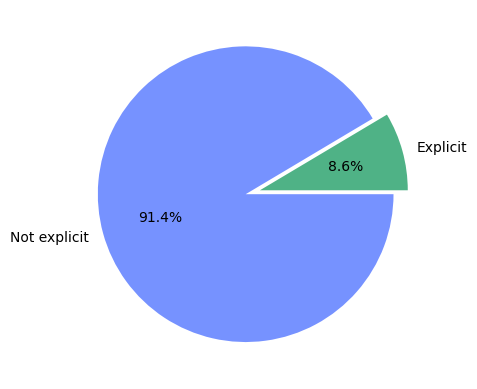

In [133]:
exp_percY = (len(df[df['explicit'] == True]) / len(df)) * 100
exp_percN = 100-exp_percY
exp_labels = ['Explicit', 'Not explicit']
explode = (0.1,0)
fig,ax = plt.subplots()
ax.pie([exp_percY,exp_percN],labels=exp_labels,autopct='%1.1f%%',colors=["#4FB286","#7692FF"],explode = explode);

In [134]:
exp_avg = df.groupby(['explicit']).agg({'explicit':'first','popularity':'mean'})
exp_avg

,explicit,popularity
explicit,,
False,False,32.937891
True,True,36.454191


In [148]:
exp_avg['explicit'] = exp_avg['explicit'].replace({True: 'True', False: 'False'})

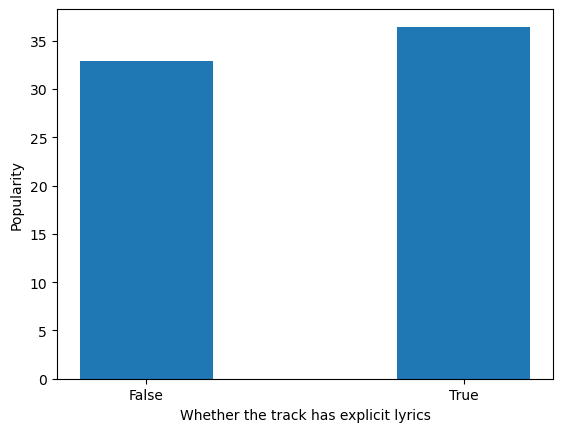

In [162]:
plt.bar(exp_avg['explicit'],exp_avg['popularity'],width=0.42,label=exp_avg['explicit']);
plt.ylabel('Popularity');
plt.xlabel('Whether the track has explicit lyrics');